<a href="https://colab.research.google.com/github/vladimbo/Bayesian/blob/master/FREDFACTORS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install quandl

In [2]:
import quandl 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

quandl.ApiConfig.api_key = "tKx_xUfgtNyNkyLM9M2R"

In [4]:
dtindex = pd.date_range(start='2004-01-01', end='2020-08-13', freq='D')
DBS = pd.DataFrame(index=dtindex)

              Value
2004-01-01   752.57
2004-01-02   752.57
2004-01-03   752.57
2004-01-04   752.57
2004-01-05   752.57
...             ...
2020-08-09  3382.80
2020-08-10  3382.80
2020-08-11  3382.80
2020-08-12  3382.80
2020-08-13  3382.80

[6070 rows x 1 columns]
              Value   Value
2004-01-01   752.57  1303.0
2004-01-02   752.57  1303.0
2004-01-03   752.57  1303.0
2004-01-04   752.57  1303.0
2004-01-05   752.57  1303.0
...             ...     ...
2020-08-09  3382.80  5362.5
2020-08-10  3382.80  5362.5
2020-08-11  3382.80  5362.5
2020-08-12  3382.80  5362.5
2020-08-13  3382.80  5362.5

[6070 rows x 2 columns]
              Value   Value  Value
2004-01-01   752.57  1303.0  9.039
2004-01-02   752.57  1303.0  9.039
2004-01-03   752.57  1303.0  9.039
2004-01-04   752.57  1303.0  9.039
2004-01-05   752.57  1303.0  9.039
...             ...     ...    ...
2020-08-09  3382.80  5362.5  3.872
2020-08-10  3382.80  5362.5  3.872
2020-08-11  3382.80  5362.5  3.872
2020-08-12  3382.80  536

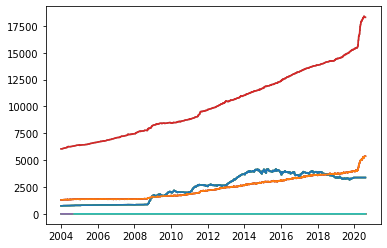

In [5]:
tickers=['BASE','M1','M1V','M2','M2V']
for ticker in tickers:
    ticker_data = (
        quandl.get('FRED/' + ticker, 
                   start_date='2004-01-01', 
                   end_date='2020-12-31'))
    DBS = pd.concat([DBS, ticker_data], axis=1)
    DBS.fillna(method='ffill', inplace=True)
    DBS.fillna(method='bfill', inplace=True)
    print(DBS)

    plt.plot(DBS)

    DBSY = DBS.pct_change(260)
    plt.plot(DBSY)

    

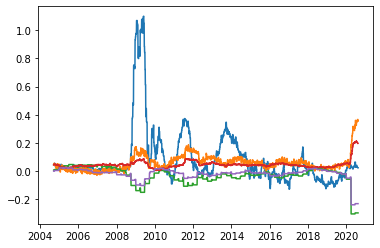

In [6]:
plt.plot(DBSY)

               Value     Value     Value     Value     Value
2004-01-01 -0.187707 -0.249956  0.572689 -0.048022  0.458115
2004-01-02 -0.187707 -0.249956  0.572689 -0.048022  0.458115
2004-01-03 -0.187707 -0.249956  0.572689 -0.048022  0.458115
2004-01-04 -0.187707 -0.249956  0.572689 -0.048022  0.458115
2004-01-05 -0.187707 -0.249956  0.572689 -0.048022  0.458115
...              ...       ...       ...       ...       ...
2020-08-09 -0.295063  5.479869 -4.412738  5.777374 -5.131978
2020-08-10 -0.295063  5.479869 -4.412738  5.777374 -5.131978
2020-08-11 -0.295063  5.268425 -4.412738  5.686113 -5.131978
2020-08-12 -0.295063  5.268425 -4.412738  5.686113 -5.131978
2020-08-13 -0.295063  5.268425 -4.412738  5.686113 -5.131978

[6070 rows x 5 columns]


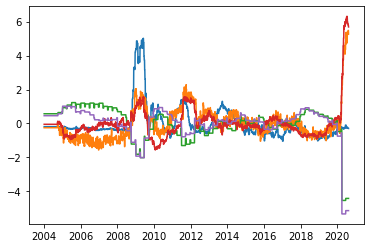

In [7]:
mean = DBSY.mean()
stdv = DBSY.std()
DBSY -= mean
DBSY /= stdv
DBSY.fillna(method='bfill', inplace=True)
print(DBSY)
plt.plot(DBSY)

In [9]:
DBSNP = DBSY.to_numpy()
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
DBSPC = pca.fit_transform(DBSNP)

                  PC1       PC2       PC3
2004-01-01  -0.667976 -0.087301  0.071925
2004-01-02  -0.667976 -0.087301  0.071925
2004-01-03  -0.667976 -0.087301  0.071925
2004-01-04  -0.667976 -0.087301  0.071925
2004-01-05  -0.667976 -0.087301  0.071925
...               ...       ...       ...
2020-08-09  10.045278 -2.884641 -0.057455
2020-08-10  10.045278 -2.884641 -0.057455
2020-08-11   9.900421 -2.844698  0.043590
2020-08-12   9.900421 -2.844698  0.043590
2020-08-13   9.900421 -2.844698  0.043590

[6070 rows x 3 columns]


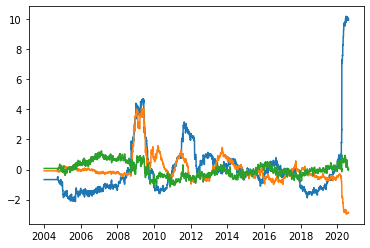

In [10]:
DBSP = pd.DataFrame({'PC1': DBSPC[:, 0], 'PC2': DBSPC[:, 1], 'PC3': DBSPC[:,2]}, index=dtindex)
print(DBSP)
plt.plot(DBSP)